# Modeling

In [1008]:
from datetime import datetime

start_time = datetime.now()

# Libraries to load
# !pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
import numpy as np
%matplotlib inline

print('LOAD DURATION: ',
      datetime.now() - start_time)  # load time about 30 seconds

LOAD DURATION:  0:00:00.001451


In [1009]:
%%time
vars = pd.read_csv('vars_final_save1.csv')

CPU times: user 325 ms, sys: 82.6 ms, total: 408 ms
Wall time: 413 ms


In [1010]:
# use this to cap variables. For some problems it helps
Clip = 10

In [1011]:
vars['fraud_label'].sum()

14393

In [1012]:
vars.head(10)

,fulladdress_count_30,ssn_firstname_count_30,homephone_count_3,ssn_dob_day_since,fulladdress_homephone_day_since,record,fraud_label
0,1,1,1,365.0,365.0,1,0
1,1,1,1,365.0,365.0,2,1
2,1,1,1,365.0,365.0,3,0
3,1,1,1,365.0,365.0,4,0
4,1,1,1,365.0,365.0,5,0
5,1,1,1,365.0,365.0,6,0
6,1,1,1,365.0,365.0,7,0
7,1,1,1,365.0,365.0,8,0
8,1,1,1,365.0,365.0,9,0
9,1,1,1,365.0,365.0,10,0


In [1013]:
vars.shape

(1000000, 7)

In [1014]:
vars.describe()

,fulladdress_count_30,ssn_firstname_count_30,homephone_count_3,ssn_dob_day_since,fulladdress_homephone_day_since,record,fraud_label
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.064624,1.048903,1.449296,331.283191,329.790635,500000.500000,0.014393
std,0.633831,0.499029,0.861622,91.969721,93.675714,288675.278933,0.119104
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,365.000000,365.000000,250000.750000,0.000000
50%,1.000000,1.000000,1.000000,365.000000,365.000000,500000.500000,0.000000
75%,1.000000,1.000000,2.000000,365.000000,365.000000,750000.250000,0.000000
max,30.000000,34.000000,32.000000,365.000000,365.000000,1000000.000000,1.000000


In [1015]:
record_save = vars['record']
Y_save = pd.DataFrame(vars.loc[:, 'fraud_label'])
Y_save.head()

,fraud_label
0,0
1,1
2,0
3,0
4,0


## Scale and truncate field values

In [1016]:
X_no_scaling = vars.drop(columns=['record', 'fraud_label'])
X_no_scaling.describe()

,fulladdress_count_30,ssn_firstname_count_30,homephone_count_3,ssn_dob_day_since,fulladdress_homephone_day_since
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.064624,1.048903,1.449296,331.283191,329.790635
std,0.633831,0.499029,0.861622,91.969721,93.675714
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,365.000000,365.000000
50%,1.000000,1.000000,1.000000,365.000000,365.000000
75%,1.000000,1.000000,2.000000,365.000000,365.000000
max,30.000000,34.000000,32.000000,365.000000,365.000000


In [1017]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [1018]:
# push in any outlier values
cols = X.columns
X.loc[:, cols] = X[cols].clip(upper=Clip)
X.loc[:, cols] = X[cols].clip(lower=-1 * Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,fulladdress_count_30,ssn_firstname_count_30,homephone_count_3,ssn_dob_day_since,fulladdress_homephone_day_since
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06
mean,-0.018176,-0.017457,-0.005814,5.598172e-13,-1.073916e-12
std,0.631721,0.579481,0.910935,1.000000e+00,1.000000e+00
min,-0.101958,-0.097996,-0.521454,-3.602090e+00,-3.520556e+00
25%,-0.101958,-0.097996,-0.521454,3.666077e-01,3.758644e-01
50%,-0.101958,-0.097996,-0.521454,3.666077e-01,3.758644e-01
75%,-0.101958,-0.097996,0.639148,3.666077e-01,3.758644e-01
max,10.000000,10.000000,10.000000,3.666077e-01,3.758644e-01


In [1019]:
# separate data into modeling (traintest) and out of time
X_trntst = X[0:833507]
Y_trntst = Y_save[0:833507]
X_oot = X[833507:]
Y_oot = Y_save[833507:]

In [1020]:
niter = 0
nitermax = 3
FDR3 = pd.DataFrame(np.zeros((nitermax, 3)), columns=('trn', 'tst', 'oot'))
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

In [1029]:
%%time
# Logistic regression

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = LogisticRegression(penalty='elasticnet',
                               C=1,
                               solver='saga',
                               l1_ratio=0.4)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5228642325416519 0.5253950338600452 0.510896898575021
1 0.5216970869092228 0.5265131226566685 0.510896898575021
2 0.5240533460347702 0.5220282626766417 0.5104777870913663
trn    0.522872
tst    0.524645
oot    0.510757
dtype: float64
CPU times: user 14.2 s, sys: 1.96 s, total: 16.2 s
Wall time: 10.8 s


## Models. You can comment out any of these cells and just explore one model type. You can also just rerun that single cell multiple times as you explore different model hyperparameters.

### Single Decition Tree

In [1046]:
%%time
# Single DT

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=20,
                                   min_samples_leaf=60,
                                   splitter='random')

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5740962413215226 0.5472214618122091 0.5414920368818106
1 0.5617380808690404 0.5733476625470177 0.5356244761106455
2 0.5732840800762631 0.5579529737206086 0.5456831517183571
trn    0.569706
tst    0.559507
oot    0.540933
dtype: float64
CPU times: user 1.71 s, sys: 175 ms, total: 1.88 s
Wall time: 1.89 s


### Random Forest

In [1052]:
%%time
# RF

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = RandomForestClassifier(bootstrap=True,
                                   n_estimators=50,
                                   max_depth=20,
                                   min_samples_leaf=20,
                                   criterion='entropy',
                                   max_features=4)
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5766746411483253 0.564299424184261 0.5511316010058676
1 0.5775923718712753 0.5656621509538291 0.5528080469404861
2 0.5764636309875814 0.5655968468468469 0.549455155071249
trn    0.576910
tst    0.565186
oot    0.551132
dtype: float64
CPU times: user 1min 3s, sys: 1.42 s, total: 1min 5s
Wall time: 1min 5s


### LightGBM

In [1060]:
%%time
# BT

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = lgb.LGBMClassifier(boosting_type='goss',
                               max_depth=7,
                               num_leaves=22,
                               n_estimators=800,
                               colsample_bytree=0.8,
                               subsample=0.8,
                               learning_rate=0.01)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel(), eval_metric='logloss')

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5717367853290184 0.5644104803493449 0.5549036043587594
1 0.5676638176638177 0.5738208205414457 0.5540653813914501
2 0.5662519627974393 0.5769849785407726 0.5553227158424141
trn    0.568551
tst    0.571739
oot    0.554764
dtype: float64
CPU times: user 7min 21s, sys: 5.79 s, total: 7min 27s
Wall time: 56.9 s


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1080x504 with 0 Axes>

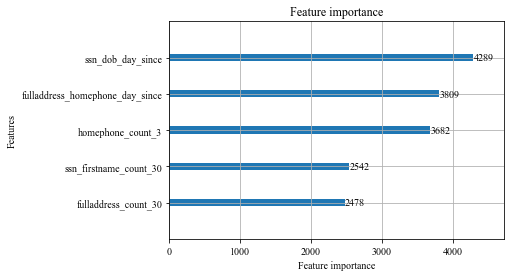

In [1062]:
plt.figure(figsize=(15, 7))
lgb.plot_importance(model, max_num_features=5)

### XGBoost

In [998]:
%%time
# XG The best time

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = xgb.XGBClassifier(use_label_encoder=False,
                              max_depth=5,
                              n_estimators=100,
                              min_child_weight=10,
                              colsample_bytree=0.8,
                              subsample=0.8,
                              eta=0.25,
                              tree_method='approx',
                              booster='gbtree',
                              nthread=8)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel(), eval_metric='logloss')

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5682441292168315 0.5713101160862355 0.5553227158424141
1 0.5712750716332379 0.5654089782429083 0.557837384744342
2 0.568904593639576 0.570941143019619 0.5557418273260687
trn    0.569475
tst    0.569220
oot    0.556301
dtype: float64
CPU times: user 3min 7s, sys: 3.6 s, total: 3min 11s
Wall time: 24.5 s


In [1069]:
%%time
# XG

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = xgb.XGBClassifier(use_label_encoder=False,
                              max_depth=5,
                              n_estimators=100,
                              min_child_weight=10,
                              colsample_bytree=0.8,
                              subsample=0.8,
                              eta=0.25,
                              tree_method='approx',
                              booster='dart',
                              nthread=8)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel(), eval_metric='auc')

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5686110447047573 0.5698983795660533 0.5553227158424141
1 0.565572799431347 0.5768367919237241 0.5553227158424141
2 0.5702240423994218 0.5673414304993253 0.5553227158424141
trn    0.568136
tst    0.571359
oot    0.555323
dtype: float64
CPU times: user 7min 13s, sys: 7.09 s, total: 7min 20s
Wall time: 56.2 s


### CatBoost

In [1077]:
%%time
# CG

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = cat.CatBoostClassifier(learning_rate=0.02,
                                   iterations=1000,
                                   loss_function='Logloss',
                                   depth=5,
                                   od_wait=300,
                                   od_type='Iter',
                                   random_state=10,
                                   l2_leaf_reg=4,
                                   verbose=300)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0:	learn: 0.6465034	total: 30.7ms	remaining: 30.6s
300:	learn: 0.0436439	total: 8.49s	remaining: 19.7s
600:	learn: 0.0433636	total: 17.3s	remaining: 11.5s
900:	learn: 0.0432204	total: 25.8s	remaining: 2.84s
999:	learn: 0.0431895	total: 28.6s	remaining: 0us
0 0.5719051590611224 0.5581073602656337 0.5528080469404861
0:	learn: 0.6468358	total: 35.8ms	remaining: 35.8s
300:	learn: 0.0446621	total: 8.54s	remaining: 19.8s
600:	learn: 0.0443996	total: 17s	remaining: 11.3s
900:	learn: 0.0442586	total: 25.4s	remaining: 2.79s
999:	learn: 0.0442240	total: 28.2s	remaining: 0us
1 0.5612956614257004 0.5837091319052987 0.5536462699077954
0:	learn: 0.6466162	total: 27ms	remaining: 26.9s
300:	learn: 0.0442183	total: 8.32s	remaining: 19.3s
600:	learn: 0.0439564	total: 16.6s	remaining: 11s
900:	learn: 0.0438197	total: 25.1s	remaining: 2.75s
999:	learn: 0.0437806	total: 27.7s	remaining: 0us
2 0.5652896486229819 0.573262629081775 0.5549036043587594
trn    0.566163
tst    0.571693
oot    0.553786
dtype: floa

### NN

In [1081]:
%%time
# NN

for niter in range(nitermax):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst,
                                                  Y_trntst,
                                                  test_size=.3)

    model = MLPClassifier(hidden_layer_sizes=10,
                          activation='tanh',
                          solver='lbfgs',
                          alpha=0.15,
                          learning_rate='constant',
                          max_iter=200)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())

    predictions = model.predict_proba(X_trn_save)[:, 1]
    X_trn['predicted'] = predictions
    X_trn['fraud_label'] = Y_trn_save['fraud_label']
    topRows = int(round(X_trn.shape[0] * 0.03))
    temp = X_trn.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'trn'] = sum(needed) / sum(X_trn.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_tst)[:, 1]
    X_tst['predicted'] = predictions
    X_tst['fraud_label'] = Y_tst['fraud_label']
    topRows = int(round(X_tst.shape[0] * 0.03))
    temp = X_tst.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'tst'] = sum(needed) / sum(X_tst.loc[:, 'fraud_label'])

    predictions = model.predict_proba(X_oot)[:, 1]
    X_oot['predicted'] = predictions
    X_oot['fraud_label'] = Y_oot['fraud_label']
    topRows = int(round(X_oot.shape[0] * 0.03))
    temp = X_oot.sort_values('predicted', ascending=False).head(topRows)
    needed = temp.loc[:, 'fraud_label']
    FDR3.loc[niter, 'oot'] = sum(needed) / sum(X_oot.loc[:, 'fraud_label'])
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'],
          FDR3.loc[niter, 'oot'])

print(FDR3.mean())

0 0.5697867298578199 0.5643397813288478 0.5544844928751048
1 0.5678067447978953 0.5679012345679012 0.5544844928751048
2 0.564634724857685 0.5737062937062937 0.5532271584241408
trn    0.567409
tst    0.568649
oot    0.554065
dtype: float64
CPU times: user 3min 44s, sys: 1min 25s, total: 5min 9s
Wall time: 41.3 s
